In [12]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install Keras

Note: you may need to restart the kernel to use updated packages.


In [22]:
#we need to process information
import numpy as np
#set to later have a standard of randomness 
np.random.seed(1)

In [23]:
# our matrices
X = np.array([[0,1,0],
[1,0,0],
[1,1,1],
[0,1,1]])
y = np.array([[0,1,1,0]]).T


#sigmoind function is just 1/e^-x we need to make x  the dot product of the matrix of products and weights plus the bias
def sigmoid(x):
    return 1/(1+np.exp(-x))
#to optimise the fnction
#cross entropy loss function - how accurate is our function to our hyothesis
def bce_loss(y,y_hat):
    N = y.shape[0]
    loss = -1/N * np.sum((y*np.log(y_hat) + (1 - y)*np.log(1-y_hat)))
    return loss


In [24]:
#initialising the weight and bias
#times 2 and -1 to have standard deviation of 1 and mean of 0
W = 2*np.random.random((3,1)) - 1
b = 0

In [25]:
# use gradient descent and chain rule to parametrically tweak for better answeres
#alpha is learning rate so rate of updates from the gradient descent
alpha = 1
#epochs is number of times we want to train the model
epochs = 20



In [26]:
#create a loop for the samples in our data
N = y.shape[0]
losses = []

for i in range(epochs):
# Forward pass
    z = X.dot(W) + b
    A = sigmoid(z)
# Calculate loss
    loss = bce_loss(y,A)
    print('Epoch:',i,'Loss:',loss)
    losses.append(loss)
# Calculate derivatives
    dz = (A - y)
    dW = 1/N * np.dot(X.T,dz)
    db = 1/N * np.sum(dz,axis=0,keepdims=True)
# Parameter updates
    W -= alpha * dW
    b -= alpha * db

Epoch: 0 Loss: 0.8223225820877986
Epoch: 1 Loss: 0.7228974481248197
Epoch: 2 Loss: 0.6468376512082379
Epoch: 3 Loss: 0.5841161222414706
Epoch: 4 Loss: 0.5309081610241326
Epoch: 5 Loss: 0.4852371787200559
Epoch: 6 Loss: 0.4457477501179715
Epoch: 7 Loss: 0.41139116414773486
Epoch: 8 Loss: 0.3813260937620897
Epoch: 9 Loss: 0.3548699981270737
Epoch: 10 Loss: 0.33146603610936654
Epoch: 11 Loss: 0.31065770214125676
Epoch: 12 Loss: 0.29206886323178305
Epoch: 13 Loss: 0.2753879903521693
Epoch: 14 Loss: 0.26035569591451885
Epoch: 15 Loss: 0.24675486898129195
Epoch: 16 Loss: 0.23440284462420913
Epoch: 17 Loss: 0.22314516463044204
Epoch: 18 Loss: 0.21285058466964538
Epoch: 19 Loss: 0.20340706040115034


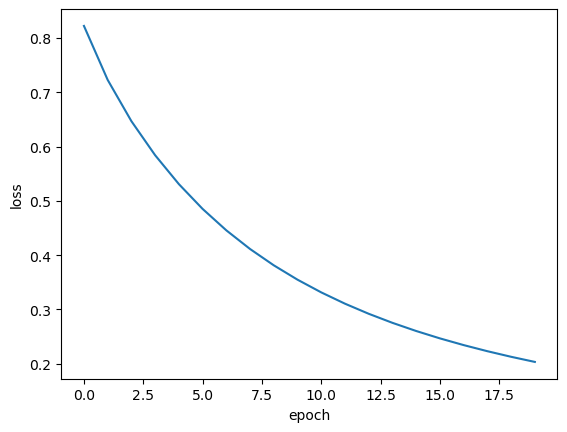

In [27]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [49]:
# Package imports
# Matplotlib is a matlab like plotting library
import matplotlib
import matplotlib.pyplot as plt
# Numpy handles matrix operations
import numpy as np
# SciKitLearn is a useful machine learning utilities library
import sklearn
# The sklearn dataset module helps generating datasets
import sklearn.datasets
import sklearn.linear_model


# Display plots inline and change default figure size
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

In [50]:
# Generate a dataset and plot it
np.random.seed(0)
X, y = sklearn.datasets.make_moons(200, noise=0.15)
y = y.reshape(200,1)

In [51]:
#for mor complex we use keras
from keras.layers import Dense, Activation
from keras.models import Sequential

In [56]:
#get the model

#put our original laer so size 3 with two dimensions 

#our first layer we use tan

#second layer we use sigmoid
model = Sequential()
model.add(Dense(3,input_dim=2))
model.add(Activation('tanh'))
model.add(Dense(3,input_dim=2))
model.add(Activation('tanh'))
model.add(Dense(1))
model.add(Activation('sigmoid'))


In [58]:
#how the model will work
model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['acc'])

In [57]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 3)                 9         
                                                                 
 activation_8 (Activation)   (None, 3)                 0         
                                                                 
 dense_9 (Dense)             (None, 3)                 12        
                                                                 
 activation_9 (Activation)   (None, 3)                 0         
                                                                 
 dense_10 (Dense)            (None, 1)                 4         
                                                                 
 activation_10 (Activation)  (None, 1)                 0         
                                                                 
Total params: 25
Trainable params: 25
Non-trainable pa

In [59]:
history = model.fit(X,y,epochs=900)

Epoch 1/900
7/7 [==============================] - 1s 4ms/step - loss: 0.5216 - acc: 0.8150
Epoch 2/900
7/7 [==============================] - 0s 4ms/step - loss: 0.5182 - acc: 0.8150
Epoch 3/900
7/7 [==============================] - 0s 6ms/step - loss: 0.5144 - acc: 0.8150
Epoch 4/900
7/7 [==============================] - 0s 4ms/step - loss: 0.5108 - acc: 0.8100
Epoch 5/900
7/7 [==============================] - 0s 3ms/step - loss: 0.5073 - acc: 0.8100
Epoch 6/900
7/7 [==============================] - 0s 4ms/step - loss: 0.5036 - acc: 0.8100
Epoch 7/900
7/7 [==============================] - 0s 4ms/step - loss: 0.5000 - acc: 0.8100
Epoch 8/900
7/7 [==============================] - 0s 4ms/step - loss: 0.4966 - acc: 0.8100
Epoch 9/900
7/7 [==============================] - 0s 4ms/step - loss: 0.4931 - acc: 0.8150
Epoch 10/900
7/7 [==============================] - 0s 6ms/step - loss: 0.4898 - acc: 0.8150
Epoch 11/900
7/7 [==============================] - 0s 6ms/step - loss: 0.4868 

7/7 [==============================] - 0s 6ms/step - loss: 0.3506 - acc: 0.8450
Epoch 90/900
7/7 [==============================] - 0s 3ms/step - loss: 0.3497 - acc: 0.8450
Epoch 91/900
7/7 [==============================] - 0s 3ms/step - loss: 0.3490 - acc: 0.8500
Epoch 92/900
7/7 [==============================] - 0s 3ms/step - loss: 0.3482 - acc: 0.8500
Epoch 93/900
7/7 [==============================] - 0s 3ms/step - loss: 0.3475 - acc: 0.8500
Epoch 94/900
7/7 [==============================] - 0s 4ms/step - loss: 0.3467 - acc: 0.8450
Epoch 95/900
7/7 [==============================] - 0s 2ms/step - loss: 0.3461 - acc: 0.8500
Epoch 96/900
7/7 [==============================] - 0s 3ms/step - loss: 0.3453 - acc: 0.8500
Epoch 97/900
7/7 [==============================] - 0s 3ms/step - loss: 0.3447 - acc: 0.8500
Epoch 98/900
7/7 [==============================] - 0s 3ms/step - loss: 0.3439 - acc: 0.8500
Epoch 99/900
7/7 [==============================] - 0s 3ms/step - loss: 0.3433 - ac

7/7 [==============================] - 0s 3ms/step - loss: 0.3138 - acc: 0.8650
Epoch 177/900
7/7 [==============================] - 0s 3ms/step - loss: 0.3136 - acc: 0.8650
Epoch 178/900
7/7 [==============================] - 0s 4ms/step - loss: 0.3134 - acc: 0.8700
Epoch 179/900
7/7 [==============================] - 0s 4ms/step - loss: 0.3134 - acc: 0.8600
Epoch 180/900
7/7 [==============================] - 0s 5ms/step - loss: 0.3132 - acc: 0.8650
Epoch 181/900
7/7 [==============================] - 0s 4ms/step - loss: 0.3130 - acc: 0.8650
Epoch 182/900
7/7 [==============================] - 0s 3ms/step - loss: 0.3126 - acc: 0.8700
Epoch 183/900
7/7 [==============================] - 0s 3ms/step - loss: 0.3124 - acc: 0.8650
Epoch 184/900
7/7 [==============================] - 0s 3ms/step - loss: 0.3124 - acc: 0.8700
Epoch 185/900
7/7 [==============================] - 0s 6ms/step - loss: 0.3121 - acc: 0.8650
Epoch 186/900
7/7 [==============================] - 0s 6ms/step - loss: 0

7/7 [==============================] - 0s 4ms/step - loss: 0.3031 - acc: 0.8800
Epoch 264/900
7/7 [==============================] - 0s 3ms/step - loss: 0.3029 - acc: 0.8750
Epoch 265/900
7/7 [==============================] - 0s 3ms/step - loss: 0.3028 - acc: 0.8800
Epoch 266/900
7/7 [==============================] - 0s 3ms/step - loss: 0.3028 - acc: 0.8800
Epoch 267/900
7/7 [==============================] - 0s 4ms/step - loss: 0.3031 - acc: 0.8800
Epoch 268/900
7/7 [==============================] - 0s 3ms/step - loss: 0.3027 - acc: 0.8800
Epoch 269/900
7/7 [==============================] - 0s 3ms/step - loss: 0.3026 - acc: 0.8800
Epoch 270/900
7/7 [==============================] - 0s 4ms/step - loss: 0.3025 - acc: 0.8800
Epoch 271/900
7/7 [==============================] - 0s 3ms/step - loss: 0.3024 - acc: 0.8800
Epoch 272/900
7/7 [==============================] - 0s 3ms/step - loss: 0.3026 - acc: 0.8800
Epoch 273/900
7/7 [==============================] - 0s 1ms/step - loss: 0

7/7 [==============================] - 0s 5ms/step - loss: 0.2989 - acc: 0.8750
Epoch 351/900
7/7 [==============================] - 0s 3ms/step - loss: 0.2987 - acc: 0.8800
Epoch 352/900
7/7 [==============================] - 0s 5ms/step - loss: 0.2993 - acc: 0.8750
Epoch 353/900
7/7 [==============================] - 0s 2ms/step - loss: 0.2988 - acc: 0.8700
Epoch 354/900
7/7 [==============================] - 0s 4ms/step - loss: 0.2989 - acc: 0.8800
Epoch 355/900
7/7 [==============================] - 0s 5ms/step - loss: 0.2987 - acc: 0.8700
Epoch 356/900
7/7 [==============================] - 0s 4ms/step - loss: 0.2985 - acc: 0.8800
Epoch 357/900
7/7 [==============================] - 0s 4ms/step - loss: 0.2986 - acc: 0.8800
Epoch 358/900
7/7 [==============================] - 0s 4ms/step - loss: 0.2985 - acc: 0.8800
Epoch 359/900
7/7 [==============================] - 0s 3ms/step - loss: 0.2983 - acc: 0.8800
Epoch 360/900
7/7 [==============================] - 0s 4ms/step - loss: 0

7/7 [==============================] - 0s 5ms/step - loss: 0.2962 - acc: 0.8700
Epoch 438/900
7/7 [==============================] - 0s 4ms/step - loss: 0.2962 - acc: 0.8800
Epoch 439/900
7/7 [==============================] - 0s 5ms/step - loss: 0.2962 - acc: 0.8800
Epoch 440/900
7/7 [==============================] - 0s 2ms/step - loss: 0.2965 - acc: 0.8800
Epoch 441/900
7/7 [==============================] - 0s 4ms/step - loss: 0.2962 - acc: 0.8800
Epoch 442/900
7/7 [==============================] - 0s 4ms/step - loss: 0.2960 - acc: 0.8800
Epoch 443/900
7/7 [==============================] - 0s 4ms/step - loss: 0.2961 - acc: 0.8800
Epoch 444/900
7/7 [==============================] - 0s 4ms/step - loss: 0.2960 - acc: 0.8800
Epoch 445/900
7/7 [==============================] - 0s 3ms/step - loss: 0.2963 - acc: 0.8800
Epoch 446/900
7/7 [==============================] - 0s 2ms/step - loss: 0.2962 - acc: 0.8800
Epoch 447/900
7/7 [==============================] - 0s 3ms/step - loss: 0

7/7 [==============================] - 0s 3ms/step - loss: 0.2946 - acc: 0.8800
Epoch 525/900
7/7 [==============================] - 0s 2ms/step - loss: 0.2943 - acc: 0.8800
Epoch 526/900
7/7 [==============================] - 0s 3ms/step - loss: 0.2946 - acc: 0.8800
Epoch 527/900
7/7 [==============================] - 0s 3ms/step - loss: 0.2950 - acc: 0.8750
Epoch 528/900
7/7 [==============================] - 0s 3ms/step - loss: 0.2948 - acc: 0.8750
Epoch 529/900
7/7 [==============================] - 0s 3ms/step - loss: 0.2946 - acc: 0.8800
Epoch 530/900
7/7 [==============================] - 0s 5ms/step - loss: 0.2948 - acc: 0.8750
Epoch 531/900
7/7 [==============================] - 0s 6ms/step - loss: 0.2949 - acc: 0.8700
Epoch 532/900
7/7 [==============================] - 0s 3ms/step - loss: 0.2952 - acc: 0.8600
Epoch 533/900
7/7 [==============================] - 0s 2ms/step - loss: 0.2947 - acc: 0.8600
Epoch 534/900
7/7 [==============================] - 0s 2ms/step - loss: 0

7/7 [==============================] - 0s 3ms/step - loss: 0.2932 - acc: 0.8800
Epoch 612/900
7/7 [==============================] - 0s 4ms/step - loss: 0.2934 - acc: 0.8800
Epoch 613/900
7/7 [==============================] - 0s 4ms/step - loss: 0.2932 - acc: 0.8800
Epoch 614/900
7/7 [==============================] - 0s 3ms/step - loss: 0.2932 - acc: 0.8800
Epoch 615/900
7/7 [==============================] - 0s 3ms/step - loss: 0.2933 - acc: 0.8800
Epoch 616/900
7/7 [==============================] - 0s 3ms/step - loss: 0.2931 - acc: 0.8800
Epoch 617/900
7/7 [==============================] - 0s 3ms/step - loss: 0.2934 - acc: 0.8700
Epoch 618/900
7/7 [==============================] - 0s 3ms/step - loss: 0.2932 - acc: 0.8700
Epoch 619/900
7/7 [==============================] - 0s 3ms/step - loss: 0.2931 - acc: 0.8700
Epoch 620/900
7/7 [==============================] - 0s 5ms/step - loss: 0.2932 - acc: 0.8700
Epoch 621/900
7/7 [==============================] - 0s 7ms/step - loss: 0

7/7 [==============================] - 0s 3ms/step - loss: 0.2921 - acc: 0.8700
Epoch 699/900
7/7 [==============================] - 0s 5ms/step - loss: 0.2924 - acc: 0.8750
Epoch 700/900
7/7 [==============================] - 0s 4ms/step - loss: 0.2921 - acc: 0.8750
Epoch 701/900
7/7 [==============================] - 0s 3ms/step - loss: 0.2920 - acc: 0.8700
Epoch 702/900
7/7 [==============================] - 0s 4ms/step - loss: 0.2920 - acc: 0.8800
Epoch 703/900
7/7 [==============================] - 0s 3ms/step - loss: 0.2918 - acc: 0.8800
Epoch 704/900
7/7 [==============================] - 0s 4ms/step - loss: 0.2921 - acc: 0.8750
Epoch 705/900
7/7 [==============================] - 0s 4ms/step - loss: 0.2919 - acc: 0.8700
Epoch 706/900
7/7 [==============================] - 0s 5ms/step - loss: 0.2920 - acc: 0.8750
Epoch 707/900
7/7 [==============================] - 0s 5ms/step - loss: 0.2919 - acc: 0.8700
Epoch 708/900
7/7 [==============================] - 0s 4ms/step - loss: 0

7/7 [==============================] - 0s 5ms/step - loss: 0.2912 - acc: 0.8750
Epoch 786/900
7/7 [==============================] - 0s 3ms/step - loss: 0.2913 - acc: 0.8800
Epoch 787/900
7/7 [==============================] - 0s 3ms/step - loss: 0.2913 - acc: 0.8800
Epoch 788/900
7/7 [==============================] - 0s 3ms/step - loss: 0.2911 - acc: 0.8800
Epoch 789/900
7/7 [==============================] - 0s 5ms/step - loss: 0.2909 - acc: 0.8800
Epoch 790/900
7/7 [==============================] - 0s 4ms/step - loss: 0.2909 - acc: 0.8800
Epoch 791/900
7/7 [==============================] - 0s 3ms/step - loss: 0.2909 - acc: 0.8800
Epoch 792/900
7/7 [==============================] - 0s 3ms/step - loss: 0.2909 - acc: 0.8800
Epoch 793/900
7/7 [==============================] - 0s 4ms/step - loss: 0.2913 - acc: 0.8750
Epoch 794/900
7/7 [==============================] - 0s 3ms/step - loss: 0.2909 - acc: 0.8800
Epoch 795/900
7/7 [==============================] - 0s 5ms/step - loss: 0

7/7 [==============================] - 0s 3ms/step - loss: 0.2903 - acc: 0.8700
Epoch 873/900
7/7 [==============================] - 0s 3ms/step - loss: 0.2906 - acc: 0.8700
Epoch 874/900
7/7 [==============================] - 0s 3ms/step - loss: 0.2901 - acc: 0.8800
Epoch 875/900
7/7 [==============================] - 0s 3ms/step - loss: 0.2899 - acc: 0.8700
Epoch 876/900
7/7 [==============================] - 0s 3ms/step - loss: 0.2911 - acc: 0.8800
Epoch 877/900
7/7 [==============================] - 0s 3ms/step - loss: 0.2903 - acc: 0.8700
Epoch 878/900
7/7 [==============================] - 0s 5ms/step - loss: 0.2905 - acc: 0.8800
Epoch 879/900
7/7 [==============================] - 0s 5ms/step - loss: 0.2900 - acc: 0.8800
Epoch 880/900
7/7 [==============================] - 0s 5ms/step - loss: 0.2904 - acc: 0.8750
Epoch 881/900
7/7 [==============================] - 0s 4ms/step - loss: 0.2906 - acc: 0.8800
Epoch 882/900
7/7 [==============================] - 0s 5ms/step - loss: 0